Dataset extracted to: /content/sample_data/speech
Contents: ['right', 'eight', 'two', 'on', 'dog', 'bed', 'no', 'nine', 'cat', 'one', 'up', 'five', 'left', 'marvin', 'README.md', 'go', 'tree', 'off', 'validation_list.txt', 'testing_list.txt', 'stop', 'zero', 'six', 'down', 'LICENSE', 'happy', 'house', 'three', '_background_noise_', 'sheila', 'wow', 'seven', 'four', 'yes', 'bird']
Available classes in the dataset: ['right', 'eight', 'two', 'on', 'dog', 'bed', 'no', 'nine', 'cat', 'one', 'up', 'five', 'left', 'marvin', 'go', 'tree', 'off', 'stop', 'zero', 'six', 'down', 'happy', 'house', 'three', '_background_noise_', 'sheila', 'wow', 'seven', 'four', 'yes', 'bird']
                 Class  Number of Files
0                right             2367
1                eight             2352
2                  two             2373
3                   on             2367
4                  dog             1746
5                  bed             1713
6                   no             2375
7      

<Figure size 1200x600 with 0 Axes>

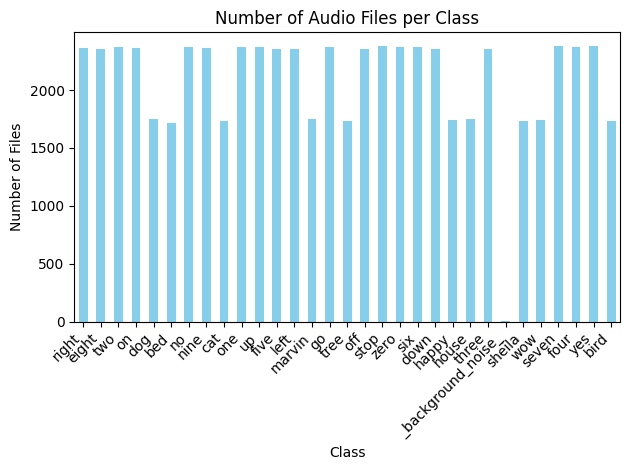

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import pandas as pd
import tensorflow as tf
import tarfile

# Define paths
custom_data_dir = '/content/sample_data/speech'

# Create the directory if it doesn't exist
if not os.path.exists(custom_data_dir):
    os.makedirs(custom_data_dir)

# Download the dataset tar file to the specified directory
tar_path = tf.keras.utils.get_file(
    origin='http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz',
    fname='speech_commands_v0.01.tar.gz',  # Save it as a file, not a directory
    untar=False)  # We will manually extract it

# Manually extract the dataset to the desired folder
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=custom_data_dir)

# Set the DATA_DIR to the location where the dataset was extracted
DATA_DIR = custom_data_dir

# Print the dataset path and confirm extraction
print(f'Dataset extracted to: {DATA_DIR}')
print(f'Contents: {os.listdir(DATA_DIR)}')

# Function to load all classes in the dataset
def get_classes(data_dir):
    classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    # Exclude "background_noise" folder if present
    if 'background_noise' in classes:
        classes.remove('background_noise')
    return classes

# Get all available classes in the dataset
CLASSES = get_classes(DATA_DIR)

# Print the list of classes (commands)
print(f"Available classes in the dataset: {CLASSES}")

# Initialize a dictionary to store the number of files per class
file_counts = {}

# Loop through each class and count the number of audio files
for class_name in CLASSES:
    class_dir = os.path.join(DATA_DIR, class_name)
    num_files = len([f for f in os.listdir(class_dir) if f.endswith('.wav')])
    file_counts[class_name] = num_files

# Convert to pandas DataFrame for better visualization
file_counts_df = pd.DataFrame(list(file_counts.items()), columns=['Class', 'Number of Files'])

# Display the counts of each class
print(file_counts_df)

# Plot the distribution of files per class
plt.figure(figsize=(12, 6))
file_counts_df.plot(kind='bar', x='Class', y='Number of Files', legend=False, color='skyblue')
plt.title('Number of Audio Files per Class')
plt.ylabel('Number of Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


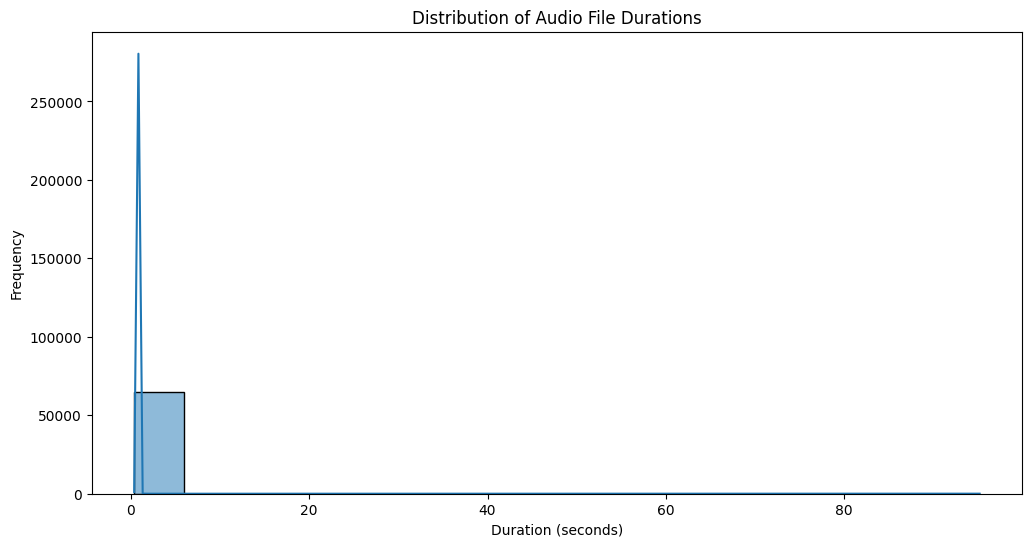

In [6]:
import librosa
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a list to store the durations
durations = []

# Loop through each class and calculate the duration of each audio file
for class_name in CLASSES:
    class_dir = os.path.join(DATA_DIR, class_name)
    for file_name in os.listdir(class_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(class_dir, file_name)
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)
            # Calculate the duration
            duration = librosa.get_duration(y=y, sr=sr)
            durations.append(duration)

# Create a DataFrame for the durations
durations_df = pd.DataFrame(durations, columns=['Duration'])

# Plot duration distribution
plt.figure(figsize=(12, 6))
sns.histplot(durations_df['Duration'], kde=True)
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


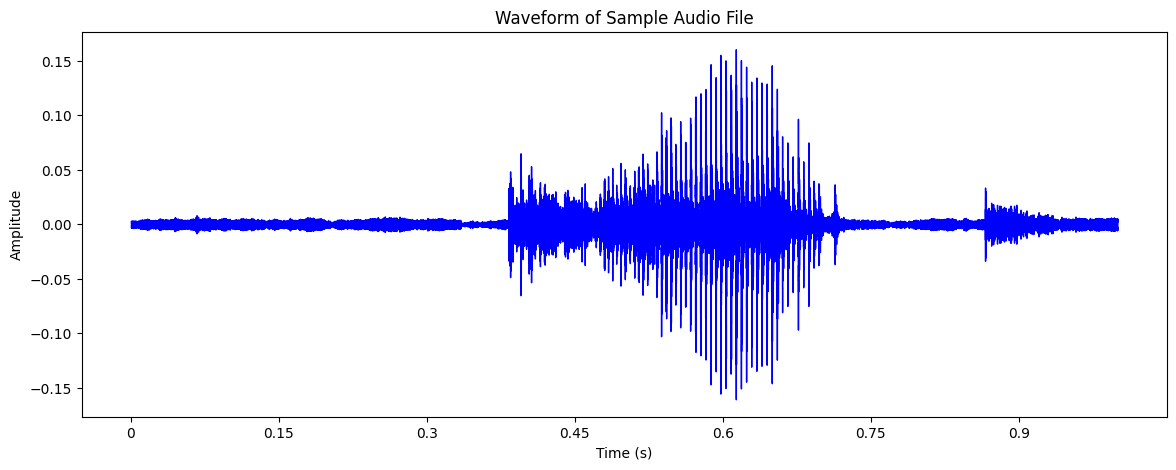

In [7]:
# Load a sample audio file
sample_file = os.path.join(custom_data_dir, 'right', '/content/sample_data/speech/cat/004ae714_nohash_0.wav')
y, sr = librosa.load(sample_file, sr=None)

# Plot waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='b')
plt.title('Waveform of Sample Audio File')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


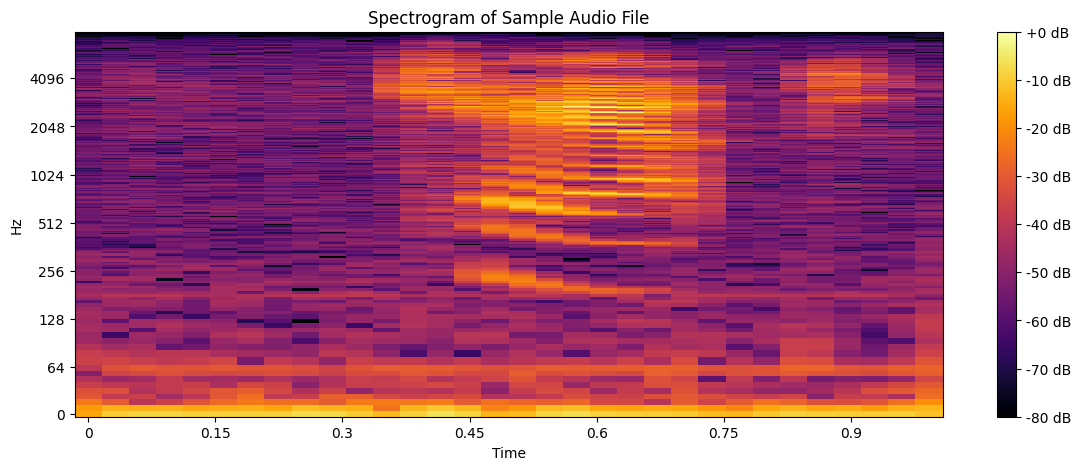

In [8]:
# Compute and plot spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='inferno')
plt.title('Spectrogram of Sample Audio File')
plt.colorbar(format='%+2.0f dB')
plt.show()


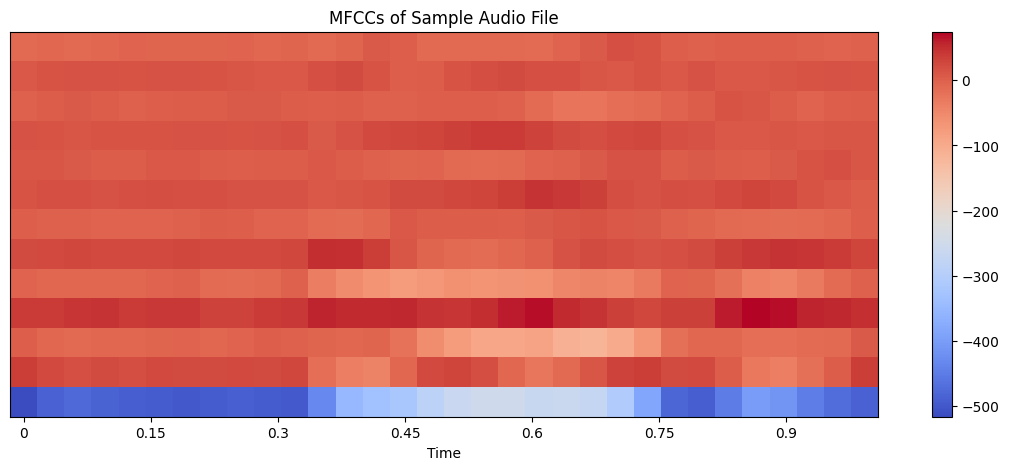

In [9]:
# Compute and plot MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title('MFCCs of Sample Audio File')
plt.colorbar()
plt.show()


<Figure size 1200x600 with 0 Axes>

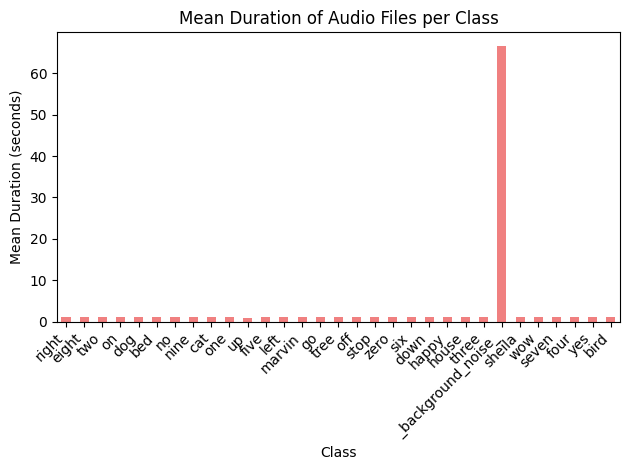

In [10]:
# Calculate duration statistics for each class
class_durations = {class_name: [] for class_name in CLASSES}

for class_name in CLASSES:
    class_dir = os.path.join(custom_data_dir, class_name)
    for file_name in os.listdir(class_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(class_dir, file_name)
            y, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=y, sr=sr)
            class_durations[class_name].append(duration)

# Compute mean duration per class
mean_durations = {class_name: np.mean(durations) for class_name, durations in class_durations.items()}
mean_durations_df = pd.DataFrame(list(mean_durations.items()), columns=['Class', 'Mean Duration'])

# Plot mean duration per class
plt.figure(figsize=(12, 6))
mean_durations_df.plot(kind='bar', x='Class', y='Mean Duration', legend=False, color='lightcoral')
plt.title('Mean Duration of Audio Files per Class')
plt.ylabel('Mean Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
import librosa
import numpy as np
import os

# Number of MFCC features to extract
n_mfcc = 32  # Updated to 32 MFCC features
num_frames = 20  # Set the number of time frames per sample

# Function to extract MFCCs
def extract_mfcc(file_path, n_mfcc=n_mfcc):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Ensure fixed-size by padding or truncating
    if mfcc.shape[1] < num_frames:
        # Padding
        padding_width = num_frames - mfcc.shape[1]
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, padding_width)), mode='constant')
    else:
        # Truncating
        mfcc_padded = mfcc[:, :num_frames]

    return mfcc_padded

# Function to prepare the dataset
def prepare_dataset(data_dir, commands):
    mfcc_features = []
    labels = []

    for label, command in enumerate(commands):
        command_dir = os.path.join(data_dir, command)
        audio_files = [f for f in os.listdir(command_dir) if f.endswith('.wav')]

        for file in audio_files:
            file_path = os.path.join(command_dir, file)
            mfcc = extract_mfcc(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)  # Encode the command as an integer label

    return np.array(mfcc_features), np.array(labels)

# Extract MFCCs and labels for all valid commands
mfcc_features, labels = prepare_dataset(DATA_DIR, CLASSES)  # Updated to use DATA_DIR and CLASSES

# Print shape of extracted features and labels
print(f"Extracted MFCC feature shape: {mfcc_features.shape}")
print(f"Labels shape: {labels.shape}")


Extracted MFCC feature shape: (64727, 32, 20)
Labels shape: (64727,)


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, Dense, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Number of MFCC coefficients and frames
num_mfcc_coeffs = 32  # Adjust based on your feature extraction
num_frames = 20  # Adjust based on your feature extraction
num_classes = len(CLASSES)  # Number of classes in your dataset

# Assuming mfcc_features and labels are your dataset
# Split the data
X_train, X_test, y_train, y_test = train_test_split(mfcc_features, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Convert labels to one-hot encoded format
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Reshape data for Conv2D
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_val_reshaped = np.expand_dims(X_val, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Define the model
model = Sequential([
    InputLayer(input_shape=(num_mfcc_coeffs, num_frames, 1)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 1), padding='valid'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 1), padding='valid'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Dropout(0.5),
    GlobalMaxPooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_reshaped, y_train_cat,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_val_reshaped, y_val_cat),
    callbacks=[EarlyStopping(patience=5)]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 168s 263ms/step - accuracy: 0.1760 - loss: 2.8103 - val_accuracy: 0.6551 - val_loss: 1.3711
Epoch 2/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 187s 239ms/step - accuracy: 0.6001 - loss: 1.2913 - val_accuracy: 0.7379 - val_loss: 1.0516
Epoch 3/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 148s 244ms/step - accuracy: 0.6892 - loss: 1.0183 - val_accuracy: 0.7727 - val_loss: 0.9257
Epoch 4/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 199s 240ms/step - accuracy: 0.7309 - loss: 0.8919 - val_accuracy: 0.7825 - val_loss: 0.8392
Epoch 5/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 200s 237ms/step - accuracy: 0.7484 - loss: 0.8143 - val_accuracy: 0.8032 - val_loss: 0.7418
Epoch 6/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 202s 237ms/step - accuracy: 0.7686 - loss: 0.7672 - val_accuracy: 0.8033 - val_loss: 0.7695
Epoch 7/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 202s 237ms/step - accuracy: 0.7747 - loss: 0.7326 - val_accuracy: 0.8094 - val_loss: 0.7229
Epoch 8/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 204s 240ms/step - accuracy: 0.7899 -

In [18]:
# Save the trained model to the content/ folder
model.save('/content/sample_data/model/speech_command_model.h5')
print("Model saved to /content/speech_command_model.h5")


Model saved to /content/speech_command_model.h5


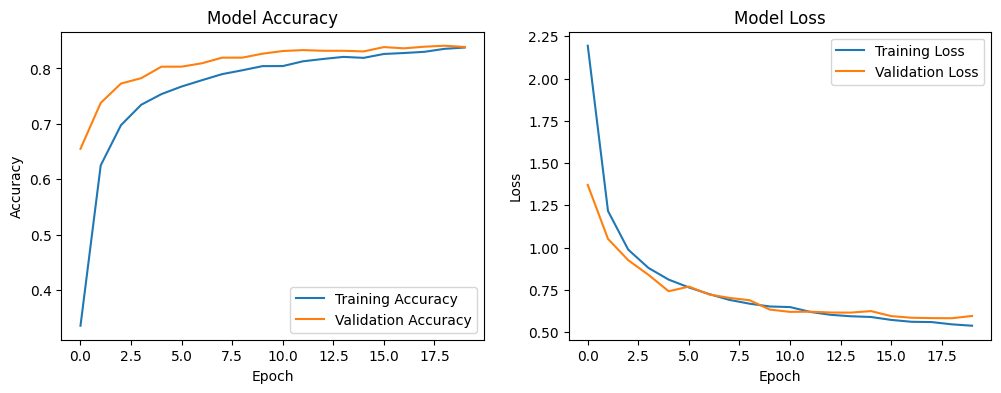

In [19]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

405/405 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8429 - loss: 0.5748
Test Accuracy: 0.85
405/405 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step


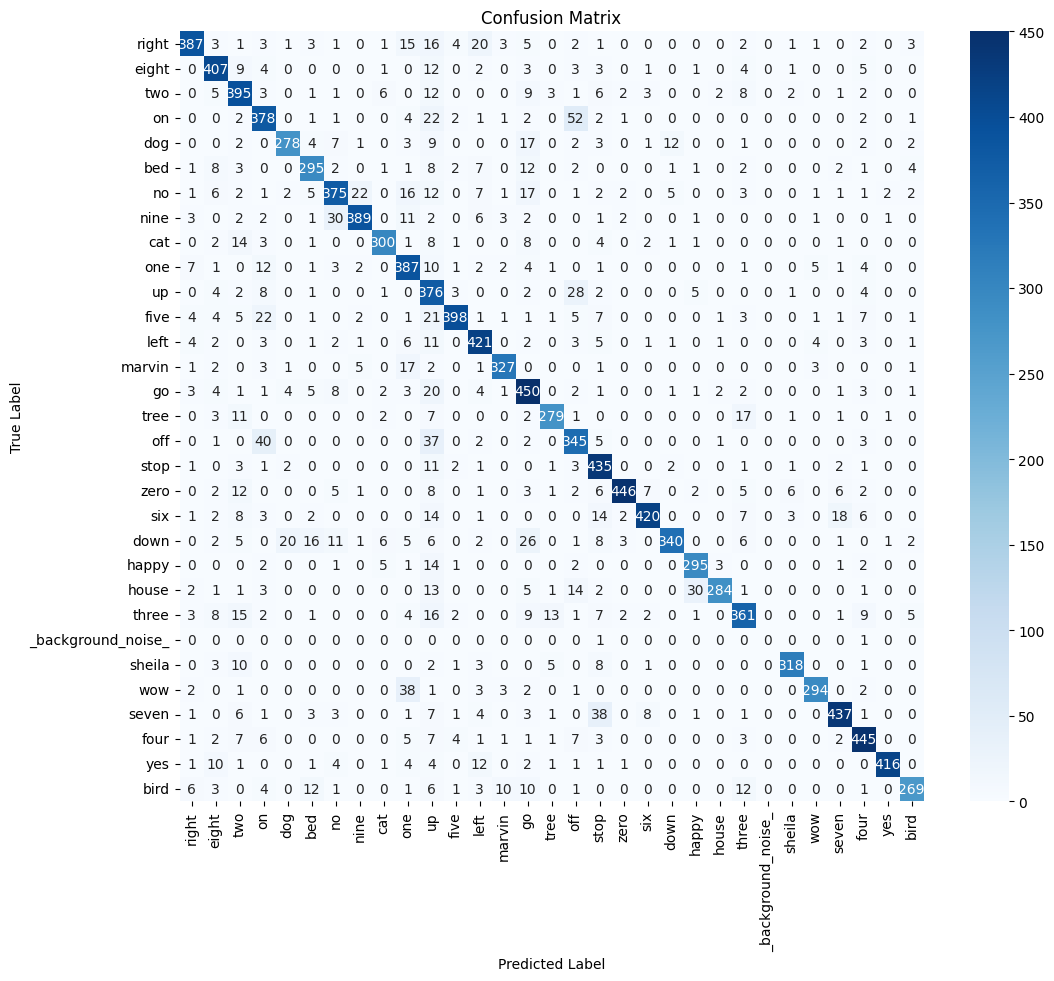

In [21]:
# Evaluate the model on the test set using one-hot encoded labels
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict the classes on the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
